<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#-------  For centering figures 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

We will import the following libraries for the lab


In [56]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.basemap import Basemap

This function is to plot the confusion matrix.


In [ ]:
#from mpl_toolkits.mplot3d import axes3d
#import matplotlib.pyplot as plt

#%matplotlib notebook

In [58]:
np.random.seed(0)

In [59]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [60]:

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [62]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
X = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")

In [63]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [64]:
Y = data['Class'].to_numpy()

In [65]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [66]:
# students get this
transform = preprocessing.StandardScaler()

In [67]:
X = transform.fit_transform(X)

In [68]:
X.mean(axis=0)
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [ ]:
X_train, X_test, Y_train, Y_test

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


## TASK  4


## Logistic Regression

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [96]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
lr=LogisticRegression()

In [97]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

GridSearchCV: class sklearn.model_selection.GridSearchCV(estimator, param_grid, , scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2n_jobs', error_score=nan, return_train_score=False)[source]¶
GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [93]:
GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
logreg_cv=GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
#logreg_cv = GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [94]:
print("Best parameter:",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Best parameter: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Refining the optimization process.
Let see if we can improve that result: instead of 3 values of C, we test a refined array of parameters C between 0.005 and 0.5 with a step of 0.005. 

In [99]:
vec=np.arange(0.005, 0.5, 0.005,dtype=float)
len(vec)    

99

In [104]:
#GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

vec=np.arange(0.01, 0.1, 0.001,dtype=float)
best_scores= np.empty([len(vec),1], dtype=float)
                     
i=0
for c in vec:  
    logreg_cv_test=GridSearchCV(estimator=lr, param_grid={"C":[c],'penalty':['l2'], 'solver':['lbfgs']}, cv=10)
#logreg_cv = GridSearchCV(lr,parameters,cv=10)
    logreg_cv_test.fit(X_train, Y_train)
    best_scores[i]=logreg_cv_test.best_score_
    i=i+1

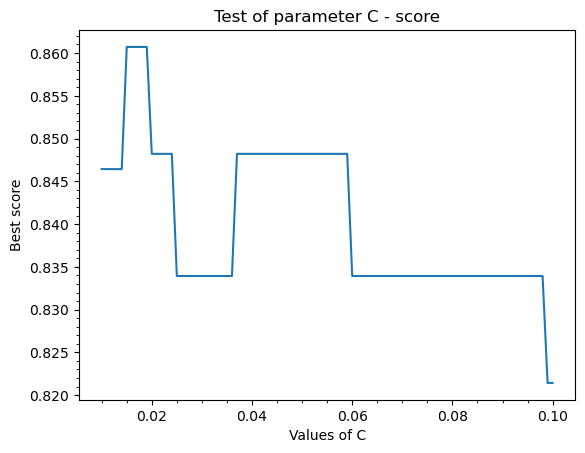

In [106]:
plt.title("Test of parameter C - score") 
plt.xlabel("Values of C") 
plt.ylabel("Best score") 
plt.plot(vec,best_scores)
plt.minorticks_on()
#plt.grid()
plt.show()

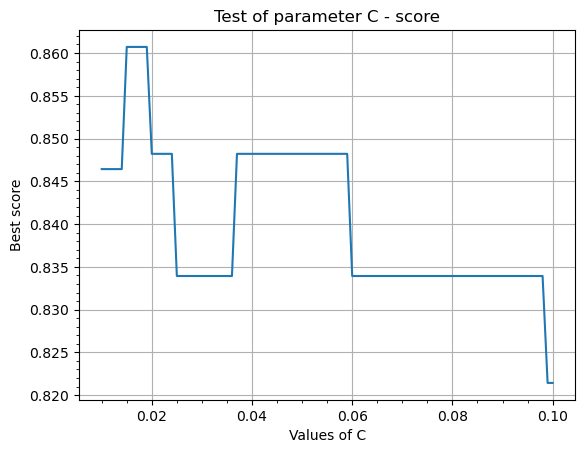

In [107]:
plt.title("Test of parameter C - score") 
plt.xlabel("Values of C") 
plt.ylabel("Best score") 
plt.plot(vec,best_scores)
plt.minorticks_on()
plt.grid()
plt.show()

In [108]:
####Max_Score_c= np.empty([len(vec),1], dtype=float)
Max_Score_c = np.amax(best_scores)
print(Max_Score_c.size)
print(Max_Score_c)
Max_Score_c_indexes = np.where(best_scores == np.amax(best_scores))  # tuple
print(Max_Score_c_indexes)

1
0.8607142857142855
(array([5, 6, 7, 8, 9], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))


In [109]:
#  we take the first element giving maximum bestscore. 
C_max=vec[ Max_Score_c_indexes[0][0] ]
print('C_max=',C_max)

C_max= 0.014999999999999996


Many values of C improve accuracy and achived maximum of best score. Close to ~0.85. Note: this is for test_train_split random_state=3 ! We will train our model with the first value of C: C= C_max. 

In [110]:
logreg_cv=GridSearchCV(estimator=lr, param_grid={"C":[C_max],'penalty':['l2'], 'solver':['lbfgs']}, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.014999999999999996], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [111]:
print("accuracy :",logreg_cv.best_score_)

accuracy : 0.8607142857142855


In [ ]:
print("accuracy :",logreg_cv.best_score_)

In [112]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.014999999999999996, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8607142857142855


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [113]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [114]:
acc_LR=logreg_cv.score(X_test, Y_test);
print('Accuracy:', acc_LR)

Accuracy: 0.8333333333333334


In [115]:
yhat_LR= logreg_cv.predict(X_test)
print (classification_report(Y_test, yhat_LR))  

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [116]:
jac_LR_0=jaccard_score(Y_test, yhat_LR, pos_label=0)
jac_LR_1=jaccard_score(Y_test, yhat_LR, pos_label=1)
f1_LR_0, f1_LR_1  =  f1_score(Y_test, yhat_LR, average=None)

LR_proba=logreg_cv.predict_proba(X_test)
log_loss_LR=log_loss(Y_test, LR_proba)

The model performs even better on the test set, with an accuracy of ~0.89.
We can see a strong F-1 score in both cases, class 0= 'Did not land', class 1='Landed'.
Again, note that all results are for random_state=3 

Lets look at the confusion matrix:

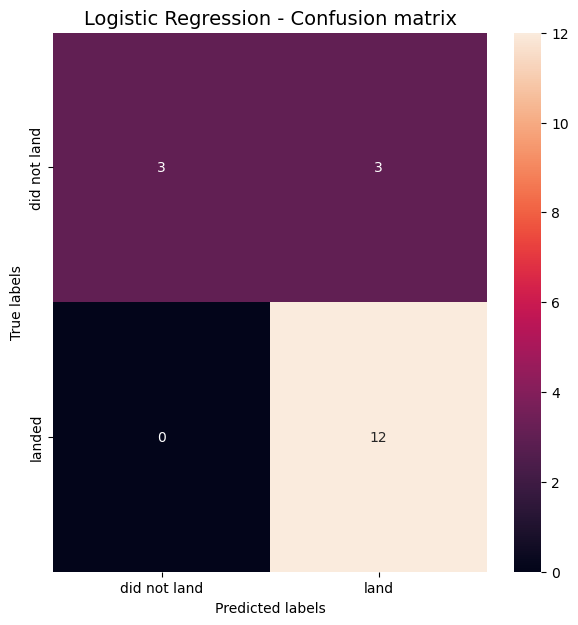

In [117]:
yhat_LR=logreg_cv.predict(X_test)
fig=plt.figure(figsize=(7,7))
plot_confusion_matrix(Y_test,yhat_LR)
plt.title("Logistic Regression - Confusion matrix", fontsize=14)
plt.savefig("figure1.png")

### Great success with class=0 prediction, and good prediction with class=1. 2 false positive. 

Lets look at the confusion matrix:


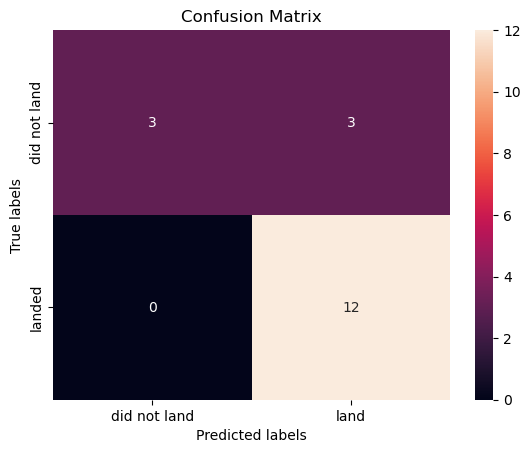

In [75]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


## 2. Support Vector Machine 

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [118]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [119]:
svm_cv = GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [120]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


On the train set, the accuracy is pretty similar to the previous improved ML technique.
With Kernel= sigmoid, can we refine parameters C and gamma around their current optimal values ? With a linear scale this time. 

In [121]:
vec_c =np.arange(0.1, 1.5, 0.1, dtype=float) 
vec_gamma =np.arange(0.01, 0.1, 0.01, dtype=float)   # GOOD
print(len(vec_c),len(vec_gamma)) 

14 9


In [122]:
best_scores_cg= np.empty([len(vec_c),len(vec_gamma)], dtype=float)
#cg= np.empty([len(vec_c),len(vec_gamma)], dtype=float)                     

i=0
for c in vec_c:  
    j=0
    for  g in  vec_gamma:
        svm_cv_test=GridSearchCV(estimator=svm, param_grid=  {'kernel': ['sigmoid'], 'C': [c], 'gamma': [g]}, cv=10) 
        svm_cv_test.fit(X_train, Y_train)
        best_scores_cg[i][j]=svm_cv_test.best_score_  
        j=j+1                                                       
                                                                
    i=i+1

We find the maximum best score in best_scores_cg and indexes. Refined optimization improved accuracy ! /b> 

In [123]:
Max_Score_cg = np.amax(best_scores_cg)
print(Max_Score_cg)

0.875


 We select the optimal couple (C, gamma)

In [124]:
Max_Score_cg_indexes = np.where(best_scores_cg == np.amax(best_scores_cg))
print(Max_Score_cg_indexes)

(array([0, 1, 3], dtype=int64), array([4, 1, 0], dtype=int64))


In [125]:
Max_Score_cg_indexes[0]
#Max_Score_cg_indexes

array([0, 1, 3], dtype=int64)

In [126]:
C_best=vec_c[Max_Score_cg_indexes[0]]
gamma_best=vec_gamma[Max_Score_cg_indexes[1]]
best_cg=np.amax(best_scores_cg)

In [127]:
print("Best score",best_cg,"Best C:", C_best, "Best gamma:",gamma_best)

Best score 0.875 Best C: [0.1 0.2 0.4] Best gamma: [0.05 0.02 0.01]


#### We plot best_scores_cg v. (C, gamma)

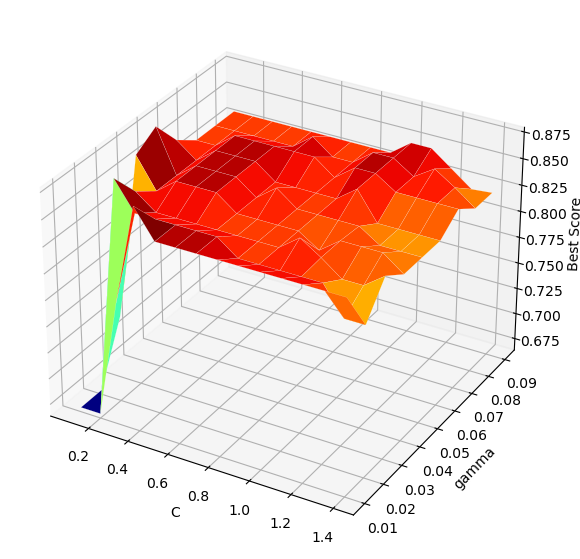

In [128]:
#fig = plt.figure()
fig=plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

XX,YY = np.meshgrid(vec_c,vec_gamma)
#ax.plot_surface(XX, YY, best_scores_cg.transpose(), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#ax.plot_surface(XX, YY, best_scores_cg.transpose(), rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.plot_surface(XX, YY, best_scores_cg.transpose(), rstride=1, cstride=1, cmap='jet', edgecolor='white', linewidth=0.1)
#cmap=cm.coolwarm
#ax.contour3D(XX,YY, best_scores_cg.transpose(), 50, cmap='binary')
#ax.contour3D(vec_gamma, vec_c, best_scores_cg, 50, cmap='binary')
ax.set_xlabel('C')
ax.set_ylabel('gamma')
ax.set_zlabel('Best Score');

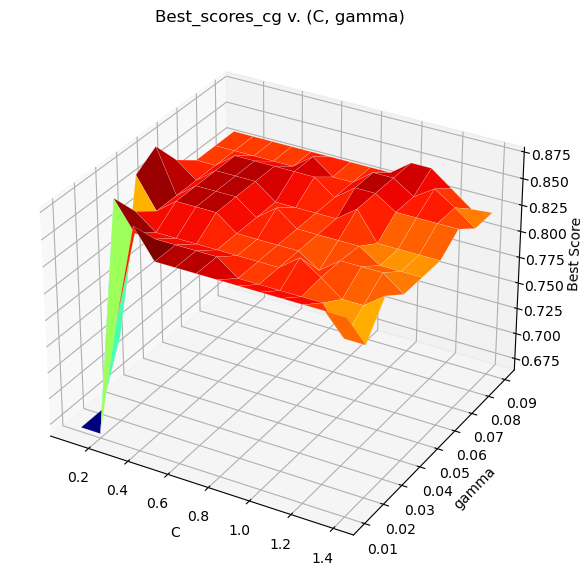

In [131]:
#fig = plt.figure()
fig=plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

XX,YY = np.meshgrid(vec_c,vec_gamma)
#ax.plot_surface(XX, YY, best_scores_cg.transpose(), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#ax.plot_surface(XX, YY, best_scores_cg.transpose(), rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.plot_surface(XX, YY, best_scores_cg.transpose(), rstride=1, cstride=1, cmap='jet', edgecolor='white', linewidth=0.1)
#cmap=cm.coolwarm
#ax.contour3D(XX,YY, best_scores_cg.transpose(), 50, cmap='binary')
#ax.contour3D(vec_gamma, vec_c, best_scores_cg, 50, cmap='binary')
ax.set_title('Best_scores_cg v. (C, gamma)')
ax.set_xlabel('C')
ax.set_ylabel('gamma')
ax.set_zlabel('Best Score');



#### We fit the model with the optimum couple (C,gamma)


In [129]:
svm_cv=GridSearchCV(estimator=svm, param_grid=  {'kernel': ['sigmoid'], 'C': C_best, 'gamma': gamma_best}, cv=10) 
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([0.1, 0.2, 0.4]),
                         'gamma': array([0.05, 0.02, 0.01]),
                         'kernel': ['sigmoid']})

In [130]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.1, 'gamma': 0.05, 'kernel': 'sigmoid'}
accuracy : 0.875


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [135]:
acc_svm=svm_cv.score(X_test, Y_test);
print('Test Accuracy:', acc_svm)

Test Accuracy: 0.8333333333333334


####  The model with optimum couple (C,gamma) does not perform that well with the test set 

In [133]:
yhat_svm= svm_cv.predict(X_test)
print (classification_report(Y_test, yhat_svm)) 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [134]:
jac_svm_0=jaccard_score(Y_test, yhat_svm, pos_label=0)
jac_svm_1=jaccard_score(Y_test, yhat_svm, pos_label=1)
f1_svm_0, f1_svm_1  =  f1_score(Y_test, yhat_svm, average=None)

We can plot the confusion matrix


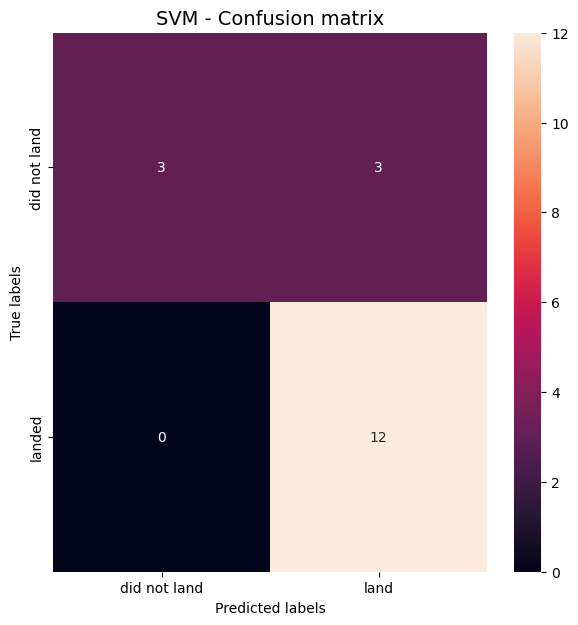

In [136]:
fig=plt.figure(figsize=(7,7))
plot_confusion_matrix(Y_test,yhat_svm)
plt.title("SVM - Confusion matrix", fontsize=14)
plt.savefig("figure2.png")

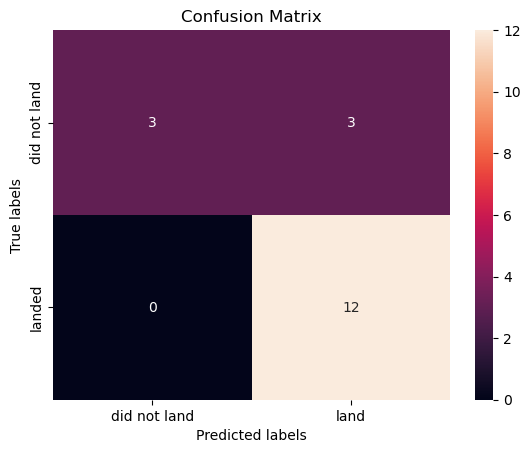

In [137]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)



#### Slight degradation on "landed" label prediction compared with LR.
#### This degradation is reflected by the Classification report


## 3. Decision Trees

TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [142]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [141]:
tree_cv = GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [143]:
print("tuned hyperparameters: (best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8857142857142856


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [144]:
acc_tree=tree_cv.score(X_test, Y_test);
print('Accuracy:', acc_tree)

Accuracy: 0.5555555555555556


In [145]:
yhat_tree = tree_cv.predict(X_test)
print (classification_report(Y_test, yhat_tree))

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         6
           1       0.75      0.50      0.60        12

    accuracy                           0.56        18
   macro avg       0.57      0.58      0.55        18
weighted avg       0.63      0.56      0.57        18



In [146]:
jac_tree_0=jaccard_score(Y_test, yhat_tree, pos_label=0)
jac_tree_1=jaccard_score(Y_test, yhat_tree, pos_label=1)
f1_tree_0, f1_tree_1  =  f1_score(Y_test, yhat_tree, average=None)

We can plot the confusion matrix


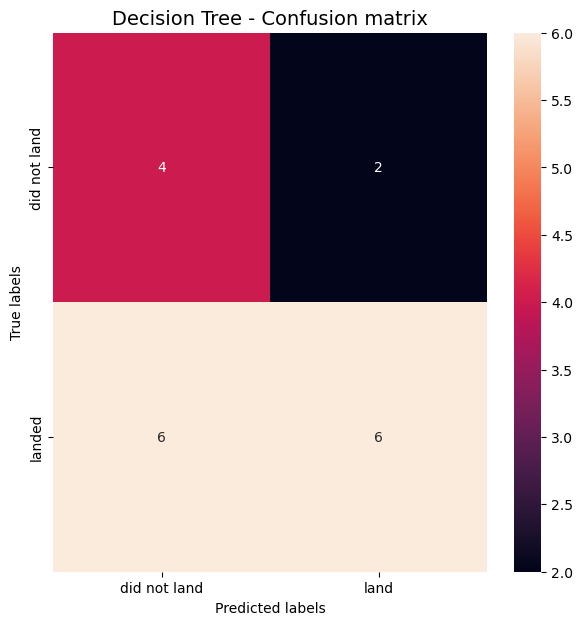

In [147]:
fig=plt.figure(figsize=(7,7))
plot_confusion_matrix(Y_test,yhat_tree)
plt.title("Decision Tree - Confusion matrix", fontsize=14)
plt.savefig("figure3.png")

### 4. K Nearest Neighbor(KNN)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [86]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [87]:
knn_cv = GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [88]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [155]:
acc_knn=knn_cv.score(X_test, Y_test);
print('Test set Accuracy:', acc_knn)

Test set Accuracy: 0.8333333333333334


#### KNN: Best accuracy with test set. No refined optimization was performed in this case. 

In [153]:
yhat_knn = knn_cv.predict(X_test)
print (classification_report(Y_test, yhat_knn))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [156]:
jac_knn_0=jaccard_score(Y_test, yhat_knn, pos_label=0)
jac_knn_1=jaccard_score(Y_test, yhat_knn, pos_label=1)
f1_knn_0, f1_knn_1  =  f1_score(Y_test, yhat_knn, average=None)

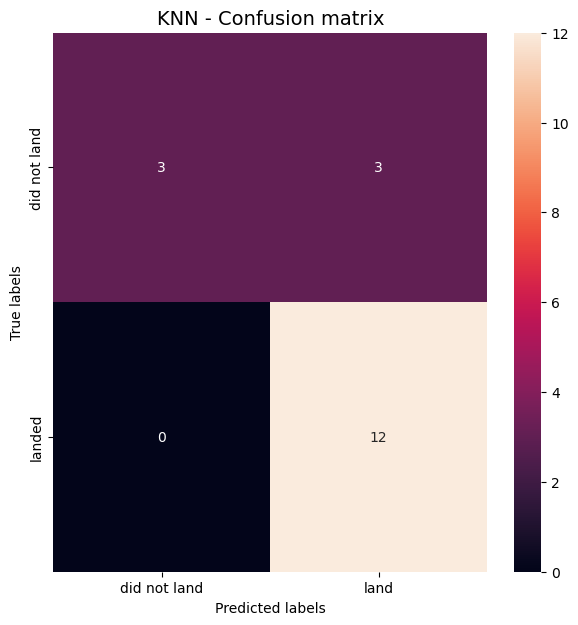

In [157]:
fig=plt.figure(figsize=(7,7))
plot_confusion_matrix(Y_test,yhat_knn)
plt.title("KNN - Confusion matrix", fontsize=14)
plt.savefig("figure4.png")

### 5. Synthesis & Conclusions 

Find the method performs best:


### TASK 12

In [166]:
# np.round does not like 'strings'  --- we replace NA with -1.    
numpy_data_0 = np.round(np.array( [[jac_LR_0, f1_LR_0, log_loss_LR] , [jac_svm_0, f1_svm_0 , -1] ,[jac_tree_0, f1_tree_0, -1 ], [jac_knn_0, f1_knn_0, -1] ] ),3)
numpy_data_1 = np.round(np.array( [[jac_LR_1, f1_LR_1, log_loss_LR] , [jac_svm_1, f1_svm_1 , -1] ,[jac_tree_1, f1_tree_1, -1 ], [jac_knn_1, f1_knn_1, -1] ] ),3)
#------------
df_0 = pd.DataFrame(data=numpy_data_0, index=["Logistic Regression", 'SVM', "Decision Tree","KNN"], columns=["Jaccard", "f1-score", 'logloss'])
df_1 = pd.DataFrame(data=numpy_data_1, index=["Logistic Regression", 'SVM', "Decision Tree","KNN"], columns=["Jaccard", "f1-score", 'logloss'])

In [167]:
df_0.columns.name = 'Algorithm'
df_1.columns.name = 'Algorithm'

df_0=df_0.replace({-1:'NA'})
df_1=df_1.replace({-1:'NA'})

In [169]:
#import numpy as np
#import pandas as pd   
from IPython.display import display_html 

#df1 = pd.DataFrame(np.arange(12).reshape((3,4)),columns=['A','B','C','D',])
#df2 = pd.DataFrame(np.arange(16).reshape((4,4)),columns=['A','B','C','D',])


styles = [dict(selector="caption",
            props=[("text-align", "left"),
                   ("font-size", "150%"),
                   ("color", 'black')])]


df_0_styler = df_0.style.set_table_attributes("style='display:inline'").set_caption('<b>Did not land</b>').set_table_styles(styles)
df_1_styler = df_1.style.set_table_attributes("style='display:inline'").set_caption('<b>Landed</b>').set_table_styles(styles)

(-0.5, 699.5, 699.5, -0.5)

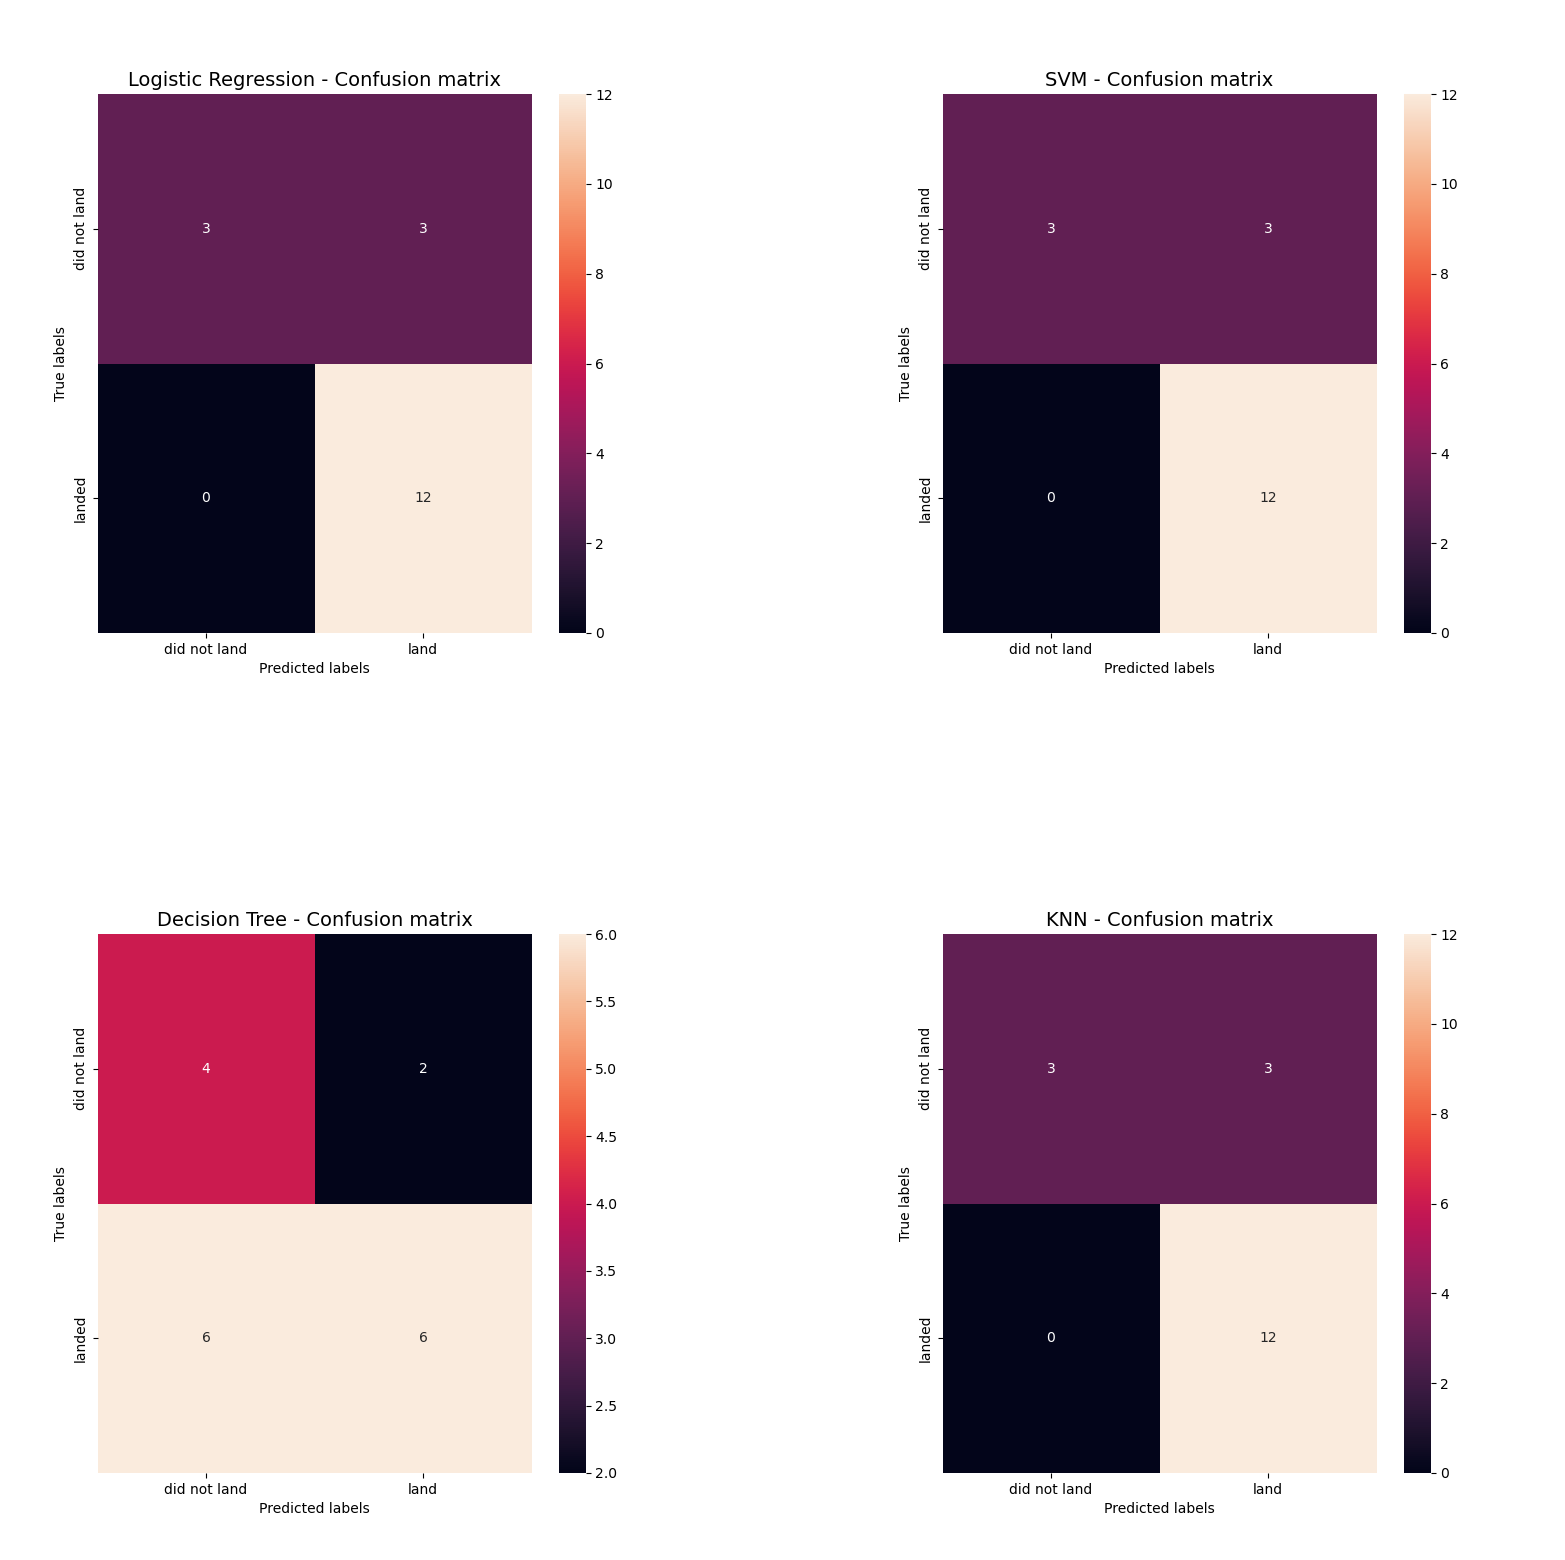

In [170]:
import matplotlib.image as mpimg  
# create figure
fig = plt.figure(figsize=(20, 20))
# setting values to rows and column variables
rows = 2
columns = 2 
# reading images
Image1 = mpimg.imread('figure1.png')
Image2 = mpimg.imread('figure2.png')
Image3 = mpimg.imread('figure3.png')
Image4 = mpimg.imread('figure4.png')

fig.add_subplot(rows, columns, 1)  
plt.imshow(Image1)
plt.axis('off')

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
  
fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.axis('off')

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.axis('off')

In [171]:
display_html(df_0_styler._repr_html_()+df_1_styler._repr_html_(), raw=True)

Algorithm,Jaccard,f1-score,logloss
Logistic Regression,0.500000,0.667000,0.457000
SVM,0.500000,0.667000,NA
Decision Tree,0.333000,0.500000,NA
KNN,0.500000,0.667000,NA
Algorithm,Jaccard,f1-score,logloss
Logistic Regression,0.800000,0.889000,0.457000
SVM,0.800000,0.889000,NA
Decision Tree,0.429000,0.600000,NA
KNN,0.800000,0.889000,NA



##### Accuracy histogram for the presentation


In [172]:
accuracy_dict = {   'Model': ['Logistic Regression', 'SVM','Decision Tree','KNN'], 'Accuracy': [acc_LR, acc_svm, acc_tree, acc_knn]   }
df_accuracy = pd.DataFrame(accuracy_dict )
blankIndex=[''] * len(df_accuracy)
df_accuracy.index=blankIndex
df_accuracy

,Model,Accuracy
,Logistic Regression,0.833333
,SVM,0.833333
,Decision Tree,0.555556
,KNN,0.833333


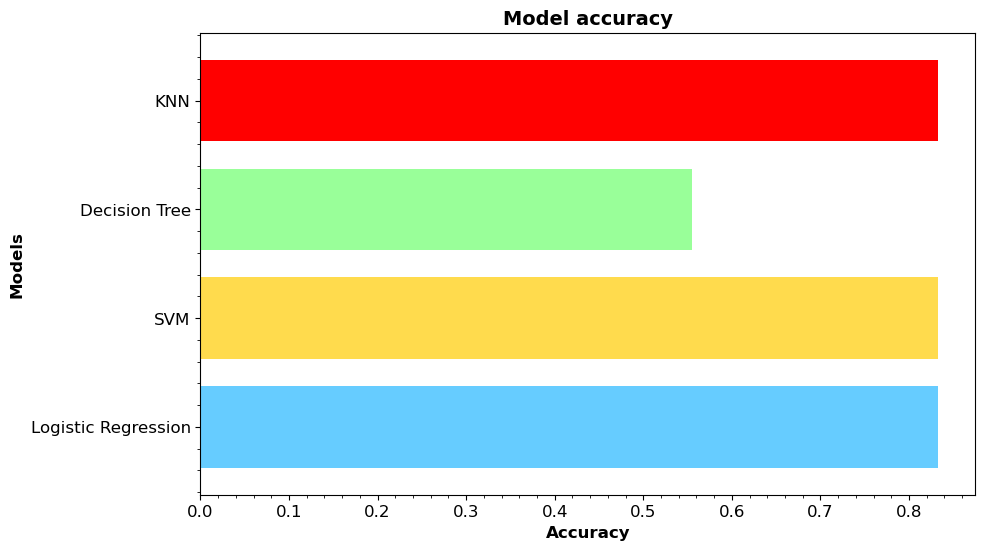

In [173]:
from matplotlib import pyplot as plt
# bars_colors=['#ABFAF7','#E8DE7B','#ABFAAE','r']  # tesing colors 
# bars_colors=['b','#E8DE7B','#ABFAAE','r']  # tesing colors 
bars_colors=['#66ccff','#ffdb4d','#99ff99','r'] # tesing colors 
#-----------------------------------------------
df_accuracy.plot(x="Model", y="Accuracy", kind="barh", width=0.75, figsize=(10, 6), fontsize=12, color =bars_colors,  legend=None )
plt.minorticks_on()
plt.title('Model accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Models', fontsize=12, fontweight='bold')
plt.xlabel('Accuracy', fontsize=12, fontweight='bold')
plt.savefig('Accuracy_models')

### In our case,DECISION TREE is the LOW accurate method the others are at per 

### After comparing accuracy of above methods, they all preformed practically
### the same, except for Decision tree which fit train data slightly better but test data worse.

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
